# Roof top module data processor

## 1. Import the packages

In [1]:
import pyodbc
from sqlalchemy import create_engine
import csv
from data_processor_object import *
import matplotlib.pyplot as plt
import os
import glob

## 2. Input

### 2.1. Input parameter desciptions

| Parameter Name | Format | Description | Example |
| --- | --- | --- | --- |
| path | string | a path of the folder the access file for module IV data is stored | r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data'|
| starting_day | string | the first day to start plotting | '2022_1_2' |
| ending_day | string | the last day to plot | '2022_12_31' |
| starting_time | string | the time in the first day to start plotting | '8:00:00 AM' |
| ending_time | string | the time in the last day to plot | '9:00:00 PM' |
| module_number_list | string | a list of module to investigate, ranging from 1 to 6 | [1, 3, 6] |
| sample_length | string | the period for resampling | 'hour', 'day', 'month' (other input won't make it resample)|
| percentile | integer | select the top percnetile of the electrical data | 90 |
| T_cetral | float | the central temperature value to select, unit is C | 45 |
| dT | float | the selected data should be with the range of T_central $\pm$ dT| 5 |
| Ir_central | float | the central irradiance value to select, unit is W/m2 | 800 |
| dIr | float | the selected data should be with the range of Ir_central $\pm$ dIr| 50 |


### 2.2 Input cell

In [2]:
# path to read
# path = r'C:\Users\sijin wang\Desktop\research\RA\Module_data_project\data'
path = r'C:\Users\sijin wang\OneDrive - UNSW\RA\Roof_module_data'

# plotting time
starting_day = '2022_1_1'
ending_day = '2022_12_31'
starting_time = '8:00:00 AM'
ending_time = '9:00:00 PM'

# define the modules to plot
module_number_list = [1, 6]

# define the resampling parameters
sample_length = 'hour'
percentile = 90

# define the data selection parameters
# for temperatures:
T_central=45
dT = 5
# for irradiance:
Ir_central = 800
dIr = 50

## 3.Data Processing

### 3.1. Data extraction

What the following cell does:
* Count the days we need to include for data analysis.
* Extract the selected days from access file to pd Dataframe.
* After successfully extract the data for each days, the processed date will be printed.

In [3]:
# define the path where access file is stored
# path = r'C:\Users\sijin wang\OneDrive - UNSW\RA\Roof_module_data'


# create a list of paths of each access file we need to open
paths = []
# Loop through all the files in the folder and add their paths to the list
for file_name in os.listdir(path):
    if os.path.isfile(os.path.join(path, file_name)):
        paths.append(str((os.path.join(path, file_name))))

# Print the list of file paths
# paths = [r'G:\09-01-2022_10-04-2022.accdb']

# define the object
data1 = module_data_processor(path = paths, starting_day=starting_day, ending_day=ending_day, starting_time=starting_time, ending_time=ending_time)

# create a list of list for all dates to select paths.
data1.file_date_reader()

# zero removing: this part remove the zero data, but not the empty ones.
data1.data_extractor(removezero=True)

2022_1_1IV
2022_1_2IV
2022_1_3IV
2022_1_25IV
2022_1_26IV
2022_1_27IV
2022_1_28IV
2022_1_29IV
2022_1_30IV
2022_1_31IV
2022_2_1IV
2022_2_2IV
2022_2_3IV
2022_2_4IV
2022_2_5IV
2022_2_6IV
2022_2_7IV
2022_2_8IV
2022_2_9IV
2022_2_10IV
2022_2_11IV
2022_2_12IV
2022_2_13IV
2022_2_14IV
2022_2_25IV
2022_2_26IV
2022_2_28IV
2022_3_1IV
2022_3_2IV
2022_3_3IV
2022_3_4IV
2022_3_5IV
2022_3_6IV
2022_3_7IV
2022_3_8IV
2022_3_9IV
2022_3_10IV
2022_3_11IV
2022_3_12IV
2022_3_13IV
2022_3_14IV
2022_3_15IV
2022_3_16IV
2022_3_17IV
2022_3_18IV
2022_3_19IV
2022_3_20IV
2022_3_21IV
2022_3_22IV
2022_3_23IV
2022_3_24IV
2022_3_25IV
2022_3_26IV
2022_3_27IV
2022_3_28IV
2022_3_29IV
2022_3_30IV
2022_3_31IV
2022_4_1IV
2022_4_2IV
2022_4_3IV
2022_4_4IV
2022_4_5IV
2022_4_6IV
2022_4_7IV
2022_4_8IV
2022_4_9IV
2022_4_10IV
2022_4_11IV
2022_4_12IV
2022_4_13IV
2022_4_14IV
2022_4_15IV
2022_4_16IV
2022_4_17IV
2022_4_18IV
2022_4_19IV
2022_4_20IV
2022_4_21IV
2022_4_22IV
2022_4_23IV
2022_4_24IV
2022_4_25IV
2022_4_26IV
2022_4_27IV
2022_4_28I

### 3.2. Data filtering & resampling

What the following cell does:
* Select the data based on which module to plot.
* Resample the data based on the defined sample length, and select the top xx percentile.
* select the data to restrict the temperature and irradiance range, temperature only include T_central $\pm$ dT and irradiance only include Ir_central $\pm$ dIr.

In [4]:
# select the module to plot: range from 1 to 6
data1.module_selector(module_num_list=module_number_list)

# resample the module: options are 'hour', 'day', 'month', put anything else it will not resample.
data1.multi_module_resampler(sample_length=sample_length, quantile_v=percentile/100)

# Select Temperature and Irradiance range
data1.bin_selector(param_name='MT', centre_value=T_central, rangevalue=dT)
data1.bin_selector(param_name='IR_BEV', centre_value=Ir_central, rangevalue=dIr)

c:\Users\sijin wang\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  return f(*args, **kwargs)


## 3. Visualization

### 3.1. The module comparison

#### 3.1.1. Short circuit current

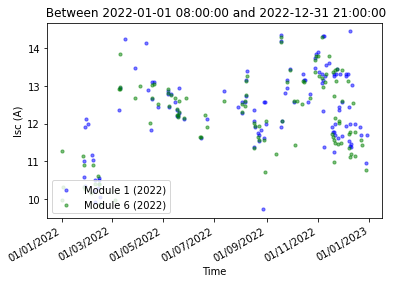

In [5]:
# # Ask user whether to interpolate the data
# options = ['Yes', 'No']
# user_option = input('Do you want the plot data to be interpolated ?')
# while user_option not in options:
#     print('Invalid input. Please select an option from the list.')
#     input('Do you want the plot data to be interpolated ?')

# # the interpolate only works for valid resampling
# if data1.resample_T == 'hour' or data1.resample_T == 'day':
#     if user_option == 'Yes':
#         whether_inter = True
#     else:
#         whether_inter = False

# else:
#     whether_inter = False
#     print('The interpolation only works for resampled by hour or day')
whether_inter = False
data1.data_ploter_with_time_multimodule(target_name='Isc', linear_fit=False, color_code=False, color_name='IR_BEV', interpol=whether_inter)

#### 3.1.2. Open circuit voltage

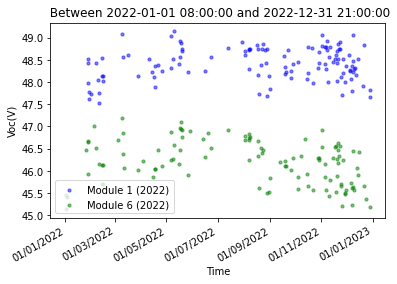

In [6]:
# # Ask user whether to interpolate the data
# options = ['Yes', 'No']
# user_option = input('Do you want the plot data to be interpolated ?')
# while user_option not in options:
#     print('Invalid input. Please select an option from the list.')
#     input('Do you want the plot data to be interpolated ?')

# # the interpolate only works for valid resampling
# if data1.resample_T == 'hour' or data1.resample_T == 'day':
#     if user_option == 'Yes':
#         whether_inter = True
#     else:
#         whether_inter = False

# else:
#     whether_inter = False
#     print('The interpolation only works for resampled by hour or day')
whether_inter = False
data1.data_ploter_with_time_multimodule(target_name='Voc', linear_fit=False, color_code=False, color_name='IR_BEV', interpol=whether_inter)

#### 3.1.3. Maximum power point

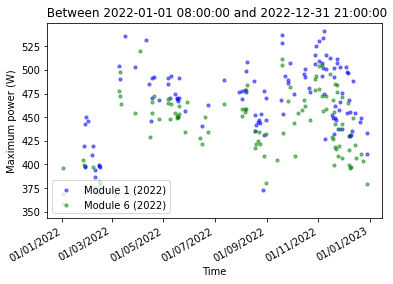

In [7]:
# # Ask user whether to interpolate the data
# options = ['Yes', 'No']
# user_option = input('Do you want the plot data to be interpolated ?')
# while user_option not in options:
#     print('Invalid input. Please select an option from the list.')
#     input('Do you want the plot data to be interpolated ?')

# # the interpolate only works for valid resampling
# if data1.resample_T == 'hour' or data1.resample_T == 'day':
#     if user_option == 'Yes':
#         whether_inter = True
#     else:
#         whether_inter = False

# else:
#     whether_inter = False
#     print('The interpolation only works for resampled by hour or day')
whether_inter = False
data1.data_ploter_with_time_multimodule(target_name='Pm', linear_fit=False, color_code=False, color_name='IR_BEV', interpol=whether_inter)

#### 3.1.4. Fill factor

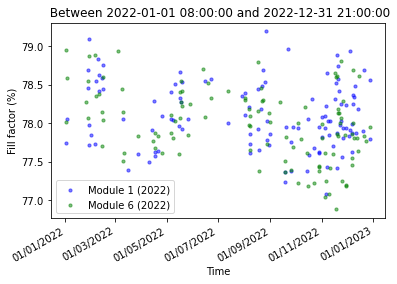

In [8]:
# # Ask user whether to interpolate the data
# options = ['Yes', 'No']
# user_option = input('Do you want the plot data to be interpolated ?')
# while user_option not in options:
#     print('Invalid input. Please select an option from the list.')
#     input('Do you want the plot data to be interpolated ?')

# # the interpolate only works for valid resampling
# if data1.resample_T == 'hour' or data1.resample_T == 'day':
#     if user_option == 'Yes':
#         whether_inter = True
#     else:
#         whether_inter = False

# else:
#     whether_inter = False
#     print('The interpolation only works for resampled by hour or day')
whether_inter = False
data1.data_ploter_with_time_multimodule(target_name='FF', linear_fit=False, color_code=False, color_name='IR_BEV', interpol=whether_inter)

#### 3.1.5. Efficiency (the module area must be given)

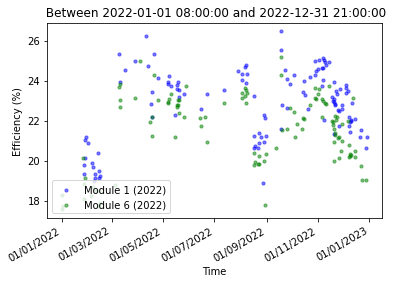

In [9]:
# # Ask user whether to interpolate the data
# options = ['Yes', 'No']
# user_option = input('Do you want the plot data to be interpolated ?')
# while user_option not in options:
#     print('Invalid input. Please select an option from the list.')
#     input('Do you want the plot data to be interpolated ?')

# # the interpolate only works for valid resampling
# if data1.resample_T == 'hour' or data1.resample_T == 'day':
#     if user_option == 'Yes':
#         whether_inter = True
#     else:
#         whether_inter = False

# else:
#     whether_inter = False
#     print('The interpolation only works for resampled by hour or day')
whether_inter = False
data1.data_ploter_with_time_multimodule(target_name='eff', linear_fit=False, color_code=False, color_name='IR_BEV', interpol=whether_inter)

### Plotting against each other

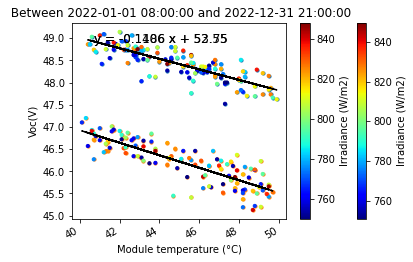

In [10]:
data1.data_parameter_plot_multimodule(x_name='MT', y_name='Voc', linear_fit=True, color_code=True)

Number of hours recorded: 8:18